In [3]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
impor

In [5]:
mass = 1000
vi = 0
dt = 1
cd = 0.2

In [12]:
def velocity(throttle):
    F = throttle - cd*vi**2
    a = F/mass
    vf = vi + a*dt + np.random.normal(0,3)
    return vf

In [9]:
kp = 0.1
ki = 0.1
kd = 0.1

In [10]:
def controller(target_speed, current_speed):
    p = target_speed - current_speed
    d = p/dt
    i = current_speed * dt
    return kp*p # + ki*i + kd*d

In [13]:
target = 80
current = vi
result = []
for t in np.arange(0,10,dt):
    throttle = controller(target, current)
    current = velocity(throttle)
    result.append([t,throttle,current])

<IPython.core.display.Javascript object>


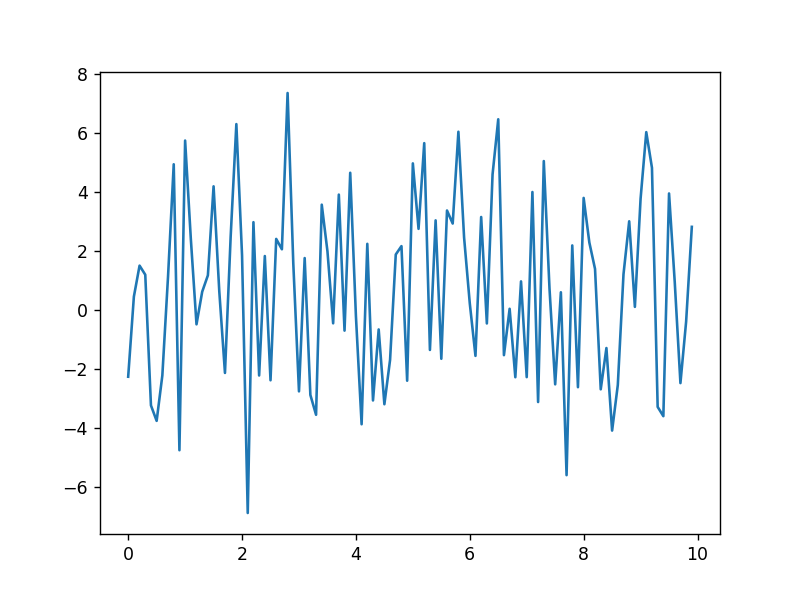

In [17]:
r = np.array(result)
plt.plot(r[:,0], r[:,2])